### DATA VERSE (SAIS)

In [53]:
library(tidyverse)
library(repr)
library(tidymodels)
library(lubridate)
library(RColorBrewer)
options(repr.matrix.max.rows = 15)

In [54]:
items <- read_csv("items.csv")
items

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 17 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): item_name, item_type, drink_temperature, drink_type
dbl (2): price, production_cost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


item_name,price,production_cost,item_type,drink_temperature,drink_type
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Espresso,3.00,0.80,Drink,Hot,Coffee
Americano,3.50,1.00,Drink,Hot,Coffee
Latte,4.50,1.20,Drink,Hot,Coffee
Cappuccino,4.25,1.15,Drink,Hot,Coffee
Flat White,4.75,1.25,Drink,Hot,Coffee
Mocha,4.80,1.40,Drink,Hot,Coffee
Iced Coffee,4.00,1.10,Drink,Cold,Coffee
Cold Brew,4.75,1.35,Drink,Cold,Coffee
⋮,⋮,⋮,⋮,⋮,⋮


In [55]:
sales <- read_csv("sales.csv")
sales

Rows: 32605 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): item_name, transaction_type, own_cup
dbl  (1): customer_id
lgl  (1): surcharge
date (1): date
time (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,time,item_name,transaction_type,own_cup,surcharge,customer_id
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>
2022-01-01,07:03:30,Cold Brew,Takeout,True,FALSE,26946
2022-01-01,07:30:58,Iced Coffee,Takeout,True,FALSE,24356
2022-01-01,08:32:23,Iced Latte,Takeout,False,FALSE,3760
2022-01-01,08:45:03,Latte,Dine-in,True,FALSE,5900
2022-01-01,09:03:47,Latte,Takeout,False,FALSE,11589
2022-01-01,10:02:30,Flat White,Takeout,True,FALSE,1786
2022-01-01,10:29:29,Iced Latte,Takeout,False,FALSE,904
2022-01-01,10:53:39,Flat White,Takeout,True,FALSE,4942
⋮,⋮,⋮,⋮,⋮,⋮,⋮


In [56]:
item_name <- left_join(sales, items)
item_name

Joining with `by = join_by(item_name)`


date,time,item_name,transaction_type,own_cup,surcharge,customer_id,price,production_cost,item_type,drink_temperature,drink_type
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2022-01-01,07:03:30,Cold Brew,Takeout,True,FALSE,26946,4.75,1.35,Drink,Cold,Coffee
2022-01-01,07:30:58,Iced Coffee,Takeout,True,FALSE,24356,4.00,1.10,Drink,Cold,Coffee
2022-01-01,08:32:23,Iced Latte,Takeout,False,FALSE,3760,4.60,1.25,Drink,Cold,Coffee
2022-01-01,08:45:03,Latte,Dine-in,True,FALSE,5900,4.50,1.20,Drink,Hot,Coffee
2022-01-01,09:03:47,Latte,Takeout,False,FALSE,11589,4.50,1.20,Drink,Hot,Coffee
2022-01-01,10:02:30,Flat White,Takeout,True,FALSE,1786,4.75,1.25,Drink,Hot,Coffee
2022-01-01,10:29:29,Iced Latte,Takeout,False,FALSE,904,4.60,1.25,Drink,Cold,Coffee
2022-01-01,10:53:39,Flat White,Takeout,True,FALSE,4942,4.75,1.25,Drink,Hot,Coffee
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


# **Wrangling:** Behaviour

# Question 1: 
How did drink sales change after the surcharge and rebrand, compared to merch?

In [57]:
before_surcharge <- item_name |>
                    filter(date < '2022-11-01') 
head(before_surcharge)

date,time,item_name,transaction_type,own_cup,surcharge,customer_id,price,production_cost,item_type,drink_temperature,drink_type
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2022-01-01,07:03:30,Cold Brew,Takeout,True,FALSE,26946,4.75,1.35,Drink,Cold,Coffee
2022-01-01,07:30:58,Iced Coffee,Takeout,True,FALSE,24356,4.00,1.10,Drink,Cold,Coffee
2022-01-01,08:32:23,Iced Latte,Takeout,False,FALSE,3760,4.60,1.25,Drink,Cold,Coffee
2022-01-01,08:45:03,Latte,Dine-in,True,FALSE,5900,4.50,1.20,Drink,Hot,Coffee
2022-01-01,09:03:47,Latte,Takeout,False,FALSE,11589,4.50,1.20,Drink,Hot,Coffee
2022-01-01,10:02:30,Flat White,Takeout,True,FALSE,1786,4.75,1.25,Drink,Hot,Coffee


In [58]:
after_surcharge <- item_name |>
                    filter(date >= '2023-11-01') 
head(after_surcharge)

date,time,item_name,transaction_type,own_cup,surcharge,customer_id,price,production_cost,item_type,drink_temperature,drink_type
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2023-11-01,07:02:12,Mocha,Takeout,False,TRUE,18864,4.80,1.4,Drink,Hot,Coffee
2023-11-01,07:03:20,Latte,Dine-in,True,FALSE,11005,4.50,1.2,Drink,Hot,Coffee
2023-11-01,08:18:11,Chai Latte,Dine-in,True,FALSE,16702,4.90,1.5,Drink,Hot,Tea
2023-11-01,08:29:37,Hot Chocolate,Dine-in,True,FALSE,6228,4.25,1.1,Drink,Hot,Other
2023-11-01,08:48:22,Mocha,Takeout,True,FALSE,25702,4.80,1.4,Drink,Hot,Coffee
2023-11-01,08:48:22,Reusable Coffee Cup,Takeout,N/A,FALSE,25702,15.00,6.0,Merchandise,N/A,NA


# Question 2:
Are customers less likely to bring their own cups for cold drinks vs hot? Why might that be?

In [59]:
before_surcharge_summary <- before_surcharge |> 
    group_by(item_type) |>
    summarise(n = n()) |>
    select(item_type, n) 
before_surcharge_summary

item_type,n
<chr>,<int>
Drink,8122
Merchandise,403


In [60]:
after_surcharge_summary <- after_surcharge |> 
    group_by(item_type) |>
    summarise(n = n()) |>
    select(item_type, n) 
after_surcharge_summary

item_type,n
<chr>,<int>
Drink,12528
Merchandise,1253


In [61]:
cold <- after_surcharge |> 
        filter(drink_temperature == "Cold") |>
        mutate(total = n()) |>
        group_by(own_cup, total) |>
        summarise(n = n()) |>
        mutate(percentage = n/total)
cold

`summarise()` has grouped output by 'own_cup'. You can override using the
`.groups` argument.


own_cup,total,n,percentage
<chr>,<int>,<int>,<dbl>
False,3892,2606,0.6695786
True,3892,1286,0.3304214


In [62]:
hot <- after_surcharge |> 
        filter(drink_temperature == "Hot") |>
        mutate(total = n()) |>
        group_by(own_cup, total) |>
        summarise(n = n()) |>
        mutate(percentage = n/total)
hot

`summarise()` has grouped output by 'own_cup'. You can override using the
`.groups` argument.


own_cup,total,n,percentage
<chr>,<int>,<int>,<dbl>
False,8636,3824,0.4427976
True,8636,4812,0.5572024


# Question 3: 
Did weekday morning customers react differently to the surcharge than customers who come on weekends or
afternoons?

In [15]:
afternoon <- item_name |>
           filter(hour(time) >= 12)
afternoon

date,time,item_name,transaction_type,own_cup,surcharge,customer_id,price,production_cost,item_type,drink_temperature,drink_type
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2022-01-01,12:35:16,Iced Latte,Takeout,True,FALSE,24017,4.60,1.25,Drink,Cold,Coffee
2022-01-01,14:04:54,Latte,Takeout,True,FALSE,25267,4.50,1.20,Drink,Hot,Coffee
2022-01-01,15:30:23,Cold Brew,Dine-in,True,FALSE,7962,4.75,1.35,Drink,Cold,Coffee
2022-01-01,15:55:21,Iced Coffee,Takeout,True,FALSE,3881,4.00,1.10,Drink,Cold,Coffee
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2024-12-31,14:24:08,Latte,Takeout,True,FALSE,15914,4.50,1.20,Drink,Hot,Coffee
2024-12-31,14:36:31,Chai Latte,Dine-in,True,FALSE,15227,4.90,1.50,Drink,Hot,Tea
2024-12-31,14:57:19,Cappuccino,Takeout,True,FALSE,21314,4.25,1.15,Drink,Hot,Coffee
2024-12-31,15:30:12,Espresso,Dine-in,False,FALSE,11063,3.00,0.80,Drink,Hot,Coffee


In [16]:
morning <- item_name |>
    filter(hour(time) < 12)
morning

date,time,item_name,transaction_type,own_cup,surcharge,customer_id,price,production_cost,item_type,drink_temperature,drink_type
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2022-01-01,07:03:30,Cold Brew,Takeout,True,FALSE,26946,4.75,1.35,Drink,Cold,Coffee
2022-01-01,07:30:58,Iced Coffee,Takeout,True,FALSE,24356,4.00,1.10,Drink,Cold,Coffee
2022-01-01,08:32:23,Iced Latte,Takeout,False,FALSE,3760,4.60,1.25,Drink,Cold,Coffee
2022-01-01,08:45:03,Latte,Dine-in,True,FALSE,5900,4.50,1.20,Drink,Hot,Coffee
2022-01-01,09:03:47,Latte,Takeout,False,FALSE,11589,4.50,1.20,Drink,Hot,Coffee
2022-01-01,10:02:30,Flat White,Takeout,True,FALSE,1786,4.75,1.25,Drink,Hot,Coffee
2022-01-01,10:29:29,Iced Latte,Takeout,False,FALSE,904,4.60,1.25,Drink,Cold,Coffee
2022-01-01,10:53:39,Flat White,Takeout,True,FALSE,4942,4.75,1.25,Drink,Hot,Coffee
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


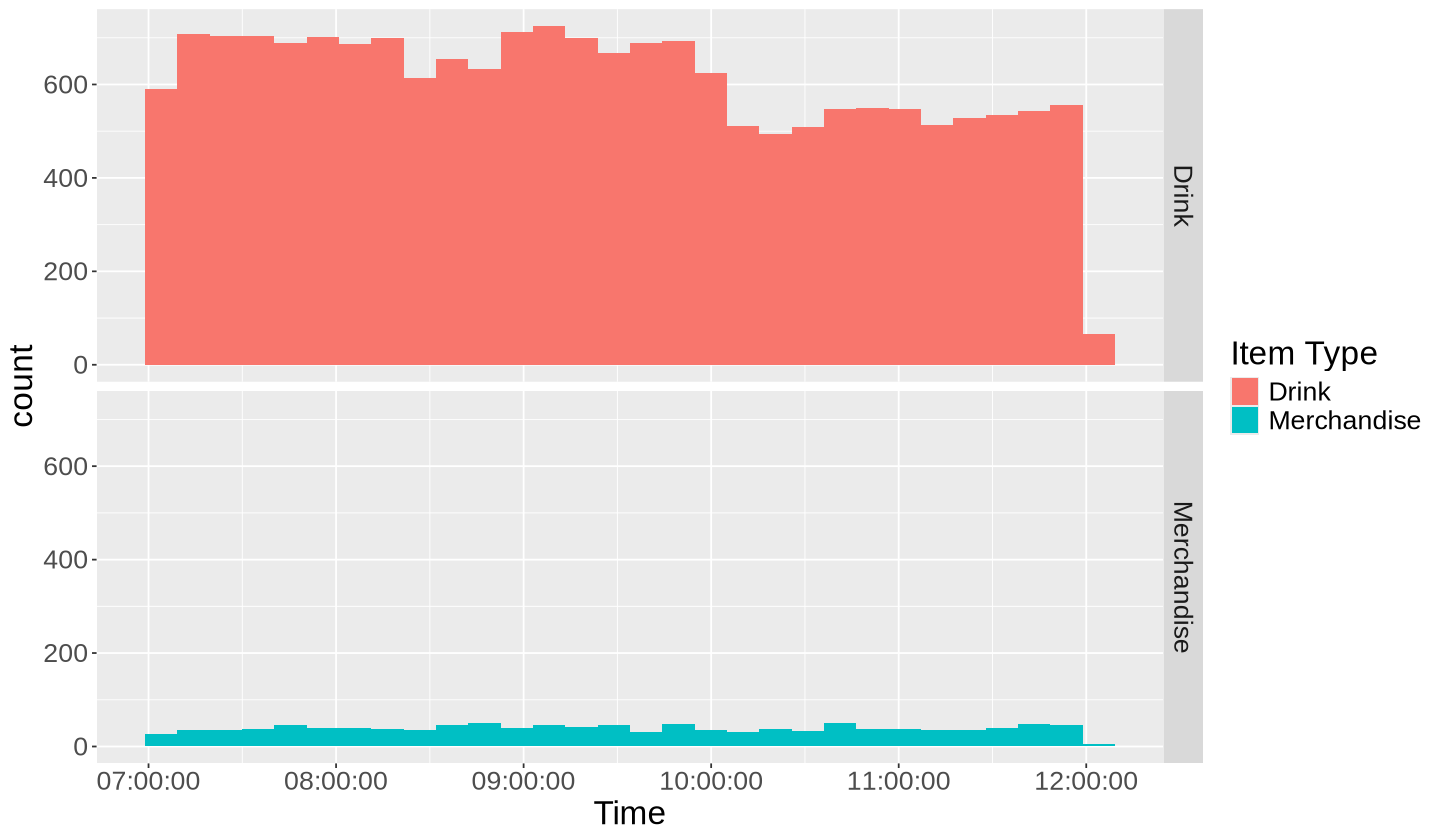

In [26]:
options(repr.plot.width = 12, repr.plot.length = 15)
morning_sales_plot <- morning |>
                        ggplot(aes(x = time, fill = item_type))+
                        geom_histogram()+
                        facet_grid(vars(item_type))+
                        labs(x = "Time", fill = "Item Type")+
                        theme(text = element_text(size = 20))
morning_sales_plot

# Question 4:
Has the mix of dine-in vs takeout, the mix of customers coming
in on weekdays vs weekends, and/or the mix of customers
coming in on mornings vs the afternoons changed since Bean &
Brew started pushing a “stay and study” vibe?

# Question 5:
Did the construction period (Fall 2022) have longer-term effects
on customer patterns?